In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sir_gillespie_step(s, i, r, t, alfa, beta, p, N):
           
    a0 = (s*i*beta + r*i*alfa + i*i*alfa)/N
    
    # choose dt for the next reaction
    dt = np.random.exponential(1./a0)
    t = t+dt
    
    # choose which reaction is next:
    p_list = np.array([s*i*beta*(1-p)/N, s*i*beta*p/N, r*i*alfa/N, i*i*alfa/N])/a0
    rand = np.random.choice(a=np.arange(0,len(p_list)), size=1, p=p_list)
    
    if(rand == 0): # reaction 1
        i += 1
        s += -1
    if(rand == 1): # reaction 1
        r += 1
        s += -1        
    if(rand == 2): # reaction 2
        r += 1
        i += -1
    if(rand == 3): # reaction 3
        r += 1
        i += -1
        
    return s, i, r, t

In [8]:
tmax = 10000

alfa = 0.15
beta = 0.85*0.34 #mean weight
p = 0.15

sm = []
im = []
rm = []
tm = []

n_sim = 1000
for k in range(n_sim):
    
    t = 0
    N = 509
    i = 1
    s = N - i
    r = 0
    
    s_list = []
    i_list = []
    r_list = []
    t_list = []

    while (t<tmax) and (i>0) and(s>0):    
        s, i, r, t = sir_gillespie_step(s, i, r, t, alfa, beta, p, N)

        s_list.append(s/N)
        i_list.append(i/N)
        r_list.append(r/N)
        t_list.append(t)
    
    sm.append(np.array(s_list))
    im.append(np.array(i_list))
    rm.append(np.array(r_list))
    tm.append(np.array(t_list))

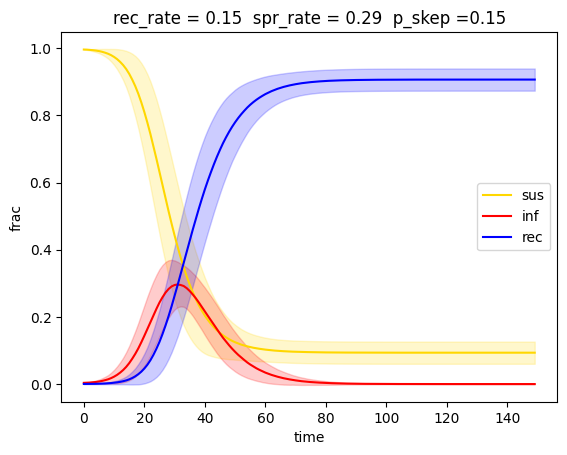

In [10]:
def seriesmean(tm, xm):
    mean_x_axis = [i for i in range(int(np.max(np.concatenate(tm))))]
    ys_interp = [np.interp(mean_x_axis, tm[i], xm[i]) for i in range(len(tm))]
    mean_y_axis = np.mean(ys_interp, axis=0)
    error = np.std(ys_interp, axis = 0)
    return mean_x_axis, mean_y_axis, error

t_s, s, s_s = seriesmean(tm,sm)
t_i, i, i_s = seriesmean(tm,im)
t_r, r, r_s = seriesmean(tm,rm)

plt.fill_between(t, s+s_s, s-s_s, alpha = 0.2, color='gold')
plt.plot(t,s, label = 'sus', c='gold')
plt.fill_between(t, i+i_s, i-i_s, alpha = 0.2, color='red') 
plt.plot(t,i, label = 'inf', c='red')
plt.fill_between(t, r+r_s, r-r_s, alpha = 0.2, color='blue') 
plt.plot(t,r, label = 'rec', c='blue')
plt.xlabel('time')
plt.ylabel('frac')
plt.title(f'rec_rate = {alfa:0.2f}  spr_rate = {beta:0.2f}  p_skep ={p:0.2f}')
plt.legend()

In [12]:
with open('output_vectors.txt', 'w') as file:
    file.write(f"Series 1: t_s = {t_s}, s = {s}, s_s = {s_s}\n")
    file.write(f"Series 2: t_i = {t_i}, i = {i}, i_s = {i_s}\n")
    file.write(f"Series 3: t_r = {t_r}, r = {r}, r_s = {r_s}\n")

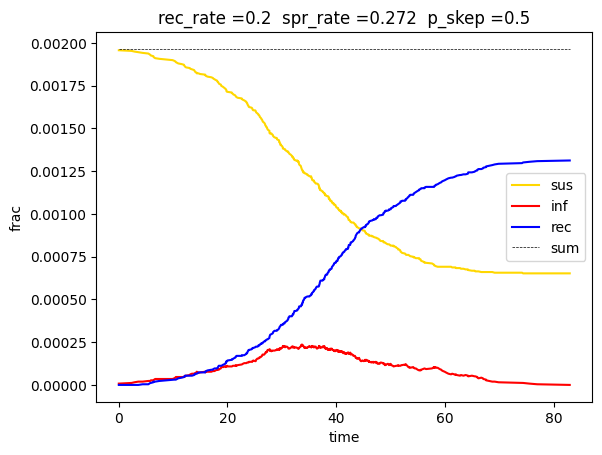

In [117]:
plt.plot(t_list, np.array(s_list)/N, label = 'sus', c='gold')
plt.plot(t_list, np.array(i_list)/N, label = 'inf', c='red')
plt.plot(t_list, np.array(r_list)/N, label = 'rec', c='blue')
plt.plot(t_list, np.array(s_list)/N+np.array(i_list)/N+np.array(r_list)/N, label = 'sum', c='black', ls='dashed', linewidth=0.5)
plt.xlabel('time')
plt.ylabel('frac')
plt.title('rec_rate ='+str(alfa)+'  spr_rate ='+str(beta)+'  p_skep ='+str(p))
plt.legend()